In [53]:
import lensing
from importlib import reload
reload(lensing)
from lensing import *
import matplotlib.pyplot as plt
from astropy.convolution import convolve, AiryDisk2DKernel

In [5]:
galaxy_image = open_fits("new2.fits")
x_deflections = open_fits("glafic-model/hlsp_relics_model_model_whl0137-08_glafic_v1_x-arcsec-deflect.fits")
y_deflections = open_fits("glafic-model/hlsp_relics_model_model_whl0137-08_glafic_v1_y-arcsec-deflect.fits")

In [6]:
source_pixel_scale = 0.0001
source_center = (0.022, -7.521)
source_pix = 1000

image_pixel_scale = 0.03
image_center = (25,-29.2)
image_pix = 666


air_pix=0.05/image_pixel_scale

In [65]:
source_plane = grid(source_center, source_pix, source_pixel_scale)
image_plane_corners = grid(image_center, image_pix+1, image_pixel_scale)
deflections_grid = grid((0,0), 1200, 0.1)
traced_image_plane_corners = ray_trace(deflections_grid, x_deflections, y_deflections, image_plane_corners, 0.566, 6.2)

In [41]:
galaxy_center = (0.005,0.005)
galaxy_angle = -70

transformed_galaxy = transform_image(galaxy_image, galaxy_angle, galaxy_center, source_pixel_scale)

In [54]:
image = lens_image(transformed_galaxy, source_plane, traced_image_plane_corners)

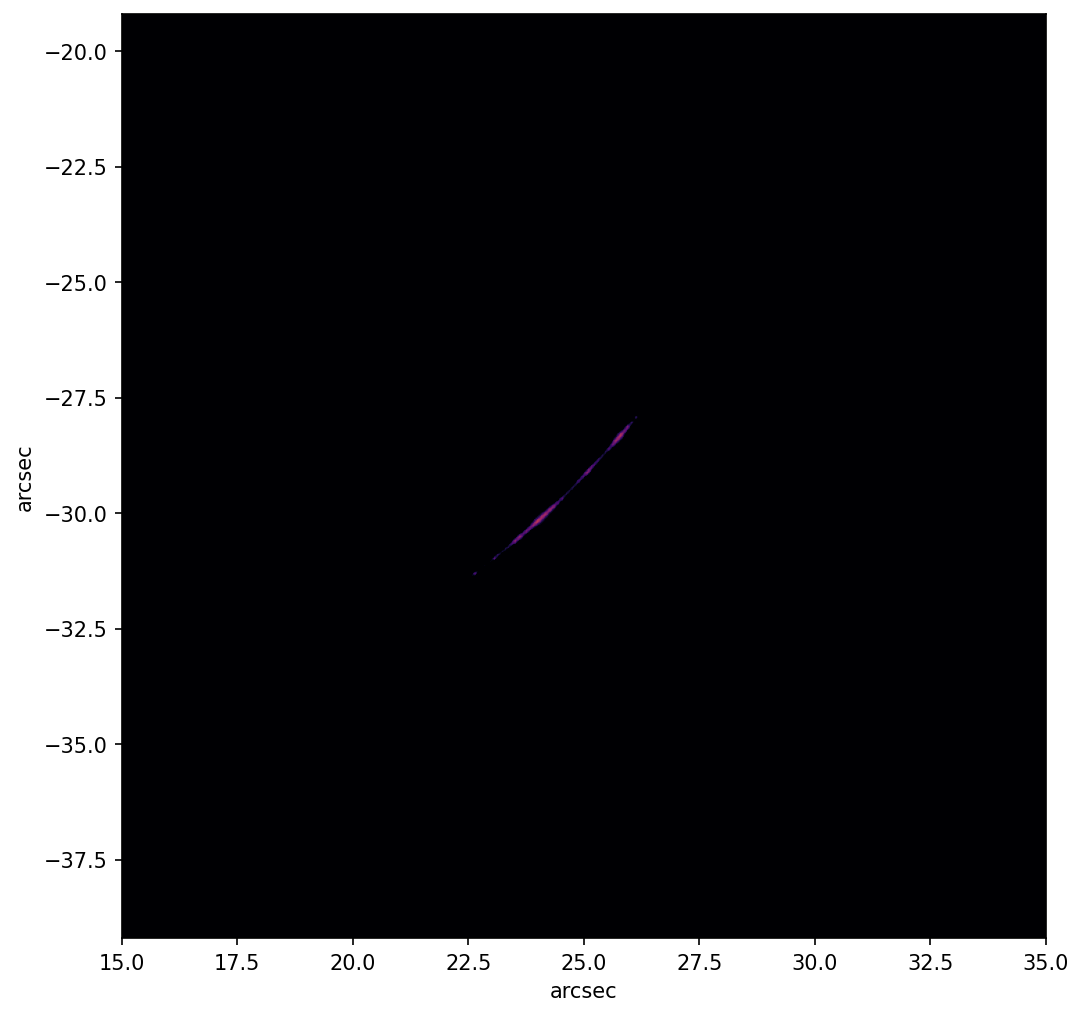

In [9]:
lensed_image = convolve(image, AiryDisk2DKernel(air_pix),fill_value=0,nan_treatment='fill')
#lensed_image = lensed_image+np.random.poisson(0.001,(image_pix,image_pix))
plot_image(lensed_image,image_center,fov=20)
# plt.xlim(22.5,27.5)
# plt.ylim(-32.5,-27.5)